# LIBRERÍAS A UTILIZAR 

In [1]:
import pandas as pd
import numpy as np
from sklearn import  linear_model
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Importamos el dataset.
viviendas = pd.read_csv('Datos_Viviendas.csv',header=0 ,sep=';')

In [2]:
# Vamos a consutlar los primeros 10 datos del dataset.
# Comprar, Mantenimiento, Puertas, Persona, maletero ,seguridad ,clase
viviendas.head(10)

,Ubicación,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Ascensor,Balcon,Terraza,Calefaccion,Aire Acondicionado,Piscina,Extras,Parking
0,"Piso en Calle Mayor, 55",145000,4,2,5,145.0,Ascensor,Balcón,Terraza,Calefacción,Aire acondicionado,NaN,5,Parking
1,Piso en Centro,399000,3,2,2,125.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,6,Parking
2,Piso en Centro,395000,4,2,2,172.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,Piscina,10,Parking
3,Piso en Centro,189500,3,2,1,104.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,1,Parking
4,Piso en Centro,370000,5,2,3,103.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,3,Parking
5,Piso en Centro,178000,2,2,4,130.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
6,Piso en Centro,385000,4,2,1,188.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,3,Parking
7,Piso en Norte,335000,3,2,7,180.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,Piscina,5,Parking
8,Piso en Centro,250000,4,1,2,106.0,Ascensor,Balcon,NaN,Calefaccion,Aire acondicionado,NaN,5,Parking
9,Piso en Sur,119000,5,2,1,146.0,Ascensor,NaN,Terraza,Calefaccion,Aire acondicionado,NaN,6,Parking


In [3]:
# Procedemos a validar que tipo de campos contiene nuestro dataset.
print(viviendas.dtypes)

Ubicación              object
Precio                  int64
Habitaciones            int64
Baños                   int64
Planta                  int64
Metros Cuadrados      float64
Ascensor               object
Balcon                 object
Terraza                object
Calefaccion            object
Aire Acondicionado     object
Piscina                object
Extras                  int64
Parking                object
dtype: object


In [48]:
# Ahora voy a visualizar cuantas filas y columnas cuenta mi dataset, esto nos hace una idea para ver si el dataset el 
# cual vamos a analizar nos sirve o en su caso cambiarlo por otro.
print(viviendas.shape)

# Vemos que contamos con 1750 registros con un total de 7 columnas.
# Visualizamos el tipo de dato que contien la columnas.
print(viviendas.info())

(11345, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11345 entries, 0 to 11344
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ubicación           11345 non-null  object 
 1   Precio              11345 non-null  int64  
 2   Habitaciones        11345 non-null  int64  
 3   Baños               11345 non-null  int64  
 4   Planta              11345 non-null  int64  
 5   Metros Cuadrados    11345 non-null  float64
 6   Ascensor            9111 non-null   object 
 7   Balcon              6907 non-null   object 
 8   Terraza             6023 non-null   object 
 9   Calefaccion         6537 non-null   object 
 10  Aire Acondicionado  9475 non-null   object 
 11  Piscina             2218 non-null   object 
 12  Extras              11345 non-null  int64  
 13  Parking             11195 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.2+ MB
None


In [49]:
# Visualizamos los valores indexados de nuestro dataset junto al tipo de dato.
print(viviendas.keys())
print()

Index(['Ubicación', 'Precio', 'Habitaciones', 'Baños', 'Planta',
       'Metros Cuadrados', 'Ascensor', 'Balcon', 'Terraza', 'Calefaccion',
       'Aire Acondicionado', 'Piscina', 'Extras', 'Parking'],
      dtype='object')



In [50]:
# Visualizamos los datos estádisticos del dataset.
viviendas.describe()

,Precio,Habitaciones,Baños,Planta,Metros Cuadrados,Extras
count,1.134500e+04,11345.000000,11345.000000,11345.000000,11345.000000,11345.000000
mean,1.426022e+05,14.121287,1.824592,2.522874,125.629623,6.143235
std,9.511684e+04,1264.163926,0.762700,1.184211,41.219656,5.585155
min,2.100000e+04,1.000000,1.000000,0.000000,1.029000,0.000000
25%,1.039100e+05,2.000000,1.000000,2.000000,101.000000,3.000000
50%,1.258420e+05,2.000000,2.000000,3.000000,122.000000,5.000000
75%,1.498640e+05,3.000000,2.000000,3.000000,144.000000,9.000000
max,3.950000e+06,134652.000000,9.000000,9.000000,900.000000,54.000000


In [51]:
# Antes de hacer nada en mi dataset,voy a visualizar con cuantos campos vacíos me voy a encontrar.
columnas = viviendas.columns.tolist()

for column in columnas:
    print("Valores nulos en <{0}>: {1}".format(column, viviendas[column].isnull().sum()))

Valores nulos en <Ubicación>: 0
Valores nulos en <Precio>: 0
Valores nulos en <Habitaciones>: 0
Valores nulos en <Baños>: 0
Valores nulos en <Planta>: 0
Valores nulos en <Metros Cuadrados>: 0
Valores nulos en <Ascensor>: 2234
Valores nulos en <Balcon>: 4438
Valores nulos en <Terraza>: 5322
Valores nulos en <Calefaccion>: 4808
Valores nulos en <Aire Acondicionado>: 1870
Valores nulos en <Piscina>: 9127
Valores nulos en <Extras>: 0
Valores nulos en <Parking>: 150


In [4]:
from sklearn import preprocessing

# Vamos a codificar las variables categoricas en valores númericos. De otro modo no podremos entrenar el modelo
transfor_datos = preprocessing.LabelEncoder()
viviendas = viviendas.apply(transfor_datos.fit_transform)

print(viviendas.keys())

Index(['Ubicación', 'Precio', 'Habitaciones', 'Baños', 'Planta',
       'Metros Cuadrados', 'Ascensor', 'Balcon', 'Terraza', 'Calefaccion',
       'Aire Acondicionado', 'Piscina', 'Extras', 'Parking'],
      dtype='object')


In [5]:
# Vamos a contar el numero de instancias que pertenecen a cada clase

for a in viviendas:
    v = print(viviendas.value_counts(a))
    print('La columna ', v)

Ubicación
1516    997
726     984
723     982
1034    974
931     951
       ... 
612       1
611       1
610       1
609       1
1582      1
Length: 1583, dtype: int64
La columna  None
Precio
3908    54
3345    44
4981    31
863     31
4474    30
        ..
3156     1
3155     1
3154     1
3153     1
9037     1
Length: 9038, dtype: int64
La columna  None
Habitaciones
1     4994
2     3621
0     2125
3      487
4       85
5       26
6        2
7        2
8        1
9        1
10       1
dtype: int64
La columna  None
Baños
1    4935
0    4259
2    2077
3      53
4      11
5       5
7       4
6       1
dtype: int64
La columna  None
Planta
3    4080
2    2460
1    2335
4    1974
0     291
5      92
6      46
7      46
8      16
9       5
dtype: int64
La columna  None
Metros Cuadrados
56     186
86     177
66     175
62     174
76     167
      ... 
178      1
176      1
171      1
170      1
244      1
Length: 245, dtype: int64
La columna  None
Ascensor
3    7667
4    2234
2     828
1    

array([[<AxesSubplot:title={'center':'Ubicación'}>,
        <AxesSubplot:title={'center':'Precio'}>,
        <AxesSubplot:title={'center':'Habitaciones'}>,
        <AxesSubplot:title={'center':'Baños'}>],
       [<AxesSubplot:title={'center':'Planta'}>,
        <AxesSubplot:title={'center':'Metros Cuadrados'}>,
        <AxesSubplot:title={'center':'Ascensor'}>,
        <AxesSubplot:title={'center':'Balcon'}>],
       [<AxesSubplot:title={'center':'Terraza'}>,
        <AxesSubplot:title={'center':'Calefaccion'}>,
        <AxesSubplot:title={'center':'Aire Acondicionado'}>,
        <AxesSubplot:title={'center':'Piscina'}>],
       [<AxesSubplot:title={'center':'Extras'}>,
        <AxesSubplot:title={'center':'Parking'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

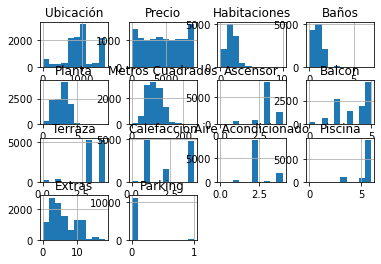

In [54]:
# Imprimimos un diagrama de barras con los algoritmos
viviendas.hist()

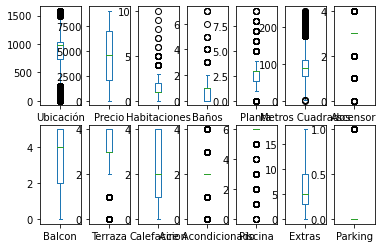

In [55]:
# Vamos a ver el digrama de cajas.
viviendas.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False)
plt.show()

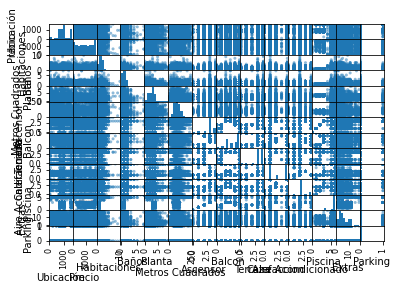

In [13]:
# Visualizamos el diagrama de dispersión.
scatter_matrix(viviendas)
plt.show()

In [6]:
X = viviendas[['Habitaciones', 'Baños', 'Planta','Metros Cuadrados','Ascensor','Balcon','Terraza','Calefaccion',
              'Aire Acondicionado','Piscina','Extras','Parking']]
y = viviendas['Precio']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True)

### Vamos a cargar los algoritmos para entrenar a nuestro modelo.


In [8]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor()
training_model = modelo.fit(X_train, y_train)

### Vamos a calcular la predicción 

In [9]:
prediccion_train= modelo.predict(X_train)

# Precision del modelo para los datos de entrenamiento.

Podemos comprobar quen nuestro modelo contiene una precisión del 86%. Podemos ver que nuestro modelo tiene una buena precisión. La precisión en los modelos de entrenamiento puede ir variando conforme vayamos entrenando el modelo ya que al usar datos aleatorios, nunca obtendremos el mismo resultado.

In [10]:
precision_train= modelo.score(X_train,y_train)
print('Precisión del modelo de entrenamiento: ',precision_train)

Precisión del modelo de entrenamiento:  0.8634261412543055


# Precision del modelo para los datos de test.
Precision del modelo para los datos test. Para dicho entrenamiento al tener valores de test aletarorio (Shuffle) 
cada ejecucíon nos dará un porcentaje diferente, por lo que nunca será similar a la ejecucíon anterior.

In [11]:
precision_test= modelo.score(X_test,y_test)
print('Precisión del modelo test: ',precision_test)

Precisión del modelo test:  0.06013913594469511


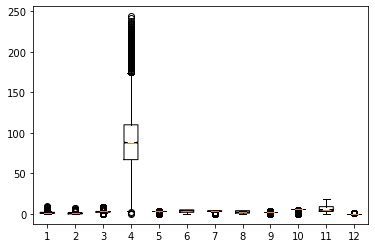

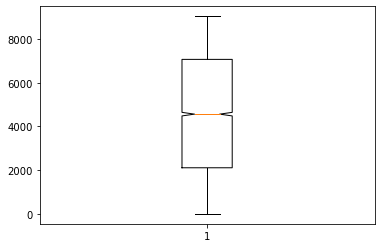

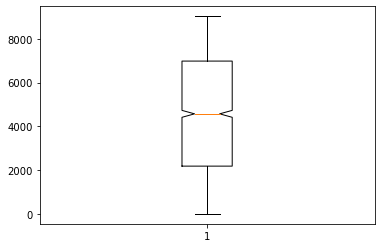

In [12]:
plt.figure()
plt.boxplot(X_train,'asdf')
plt.show()

plt.figure()
plt.boxplot(y_train,'asdf')
plt.show()

plt.figure()
plt.boxplot(y_test,'asdf')
plt.show()

# PROCEDEMOS A CALCULAR LA SIGUIENTES MÉTRICAS:

* El error absoluto medio (MAE) es la media del valor absoluto de los errores
* El error cuadrático medio (MSE) es la media de los errores cuadráticos.
* El error cuadrático medio (RMSE) es la raíz cuadrada de la media de los errores cuadráticos.

In [22]:
from sklearn import metrics

def evaluarErrores(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

testPrediccion= modelo.predict(X_test)

resultadoRandomForestRegression = pd.DataFrame(data=[["Random Forest Regression Test", * evaluarErrores(y_test, testPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
resultadoRandomForestRegression

,Modelo,MAE,MSE,RMSE,R2 Square
0,Random Forest Regression Test,2284.555474,7.242124e+06,2691.119455,0.060139


In [23]:
def evaluarErrores(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

trainPrediccion= modelo.predict(X_train)
resultadoRandomForestRegression = pd.DataFrame(data=[["Random Forest Regression Train", * evaluarErrores(y_train, trainPrediccion)]], 
                          columns=['Modelo', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
resultadoRandomForestRegression

,Modelo,MAE,MSE,RMSE,R2 Square
0,Random Forest Regression Train,865.991259,1.068109e+06,1033.493598,0.863426


# Vamos a predecir nuestro modelo RandomForestRegressor. 


In [17]:
print(modelo.predict([[5, 2, 3,140,1,1,1,1,1,0,7,1]]))

[5848.49]


/Users/joseplasenciavillarejo/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
